[[0 0]
 [1 0]
 [5 1]
 [0 1]]


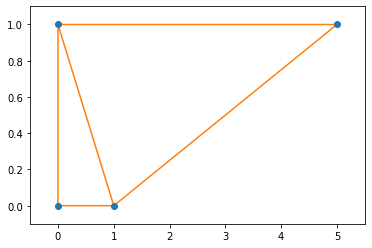

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec  5 17:38:24 2019

@author: ostab
"""
# ============================== DELAUNAY 2D ==================================
# Generez la triangulation de Delaunay correspondant a un ensemble de points
# Analysez la structure renvoyee
import numpy as np
import sympy
#import sympy.geometry
from sympy import *
from scipy.spatial import Delaunay, delaunay_plot_2d

vertices_ls = np.asarray([[0, 0], [1, 0], [5, 1], [0, 1]])
tri = Delaunay(vertices_ls)
delaunay_plot_2d(tri)
print(vertices_ls)

In [ ]:
# Analysez la structure renvoyee
tri.points
tri.simplices
tri.neighbors

array([[-1, -1,  1],
       [-1, -1,  0]], dtype=int32)

In [ ]:
# -----------------------------------------------------------------------------
# 0. Questions preliminaires :
# -----------------------------------------------------------------------------
# 0.1) : Donnez la taille des elements de la triangulation renvoyes par Delaunay().
# 0.2) : Combien de sommets contient la triangulation ? Combien de triangles ?
# 0.3) : Ou se trouvent les triangles les plus allongés (appreciez visuellement 
#      et expliquer) ?
# 0.4) : La triangulation forme t-elle convexe ?
tri.ndim

2

**0.1) taille des elements de la triangulation renvoyes par Delaunay() :tableau de deux dimensions (chaque tableau contient les coordonnées X,Y des points)contenant des entiers signés codés sur 32bits**

**0.2) : Combien de sommets contient la triangulation :4 sommets** 
**Combien de triangles :2 triangles**

**0.3) : Ou se trouvent les triangles les plus allongés : le triangle le plus allongé est celui en bas**

**0.4) : La triangulation forme t-elle convexe : Oui**

**Génération aléatoire des 100 points**

In [ ]:
# -----------------------------------------------------------------------------
# 1. Structure et EC d'une triangulation de Delaunay
# -----------------------------------------------------------------------------
# 1.0) Generer aleatoirement 100 points sur lesquels vous appliquerez Delaunay()
# Vous pouvez utiliseer le package "random" et la fonction rand()
# Augmentez le nombre de points a 1000, 10000 et appreciez l'evolution du temps 
# de reponse grace au package "time" et a la syntaxe suivante : 
import numpy as np
import random
X = np.random.randint(-80,80,100)
Y = np.random.randint(-50,50,100)
listing = list(zip(X, Y))
#Listing = list(map(list, list(zip(X, Y))))
#print(listing) 

import time
%time trilist = Delaunay(listing)
# Devinez la complexite de l'algorithme.
# Ne pas depasser 1M de points a cause de potentiels problemes de memoire

CPU times: user 1.2 ms, sys: 13 µs, total: 1.21 ms
Wall time: 1.22 ms


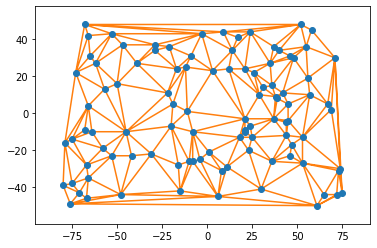

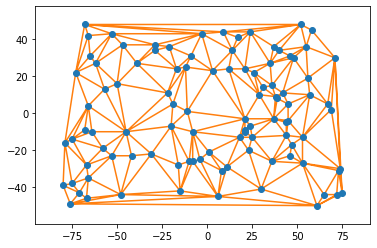

In [ ]:
delaunay_plot_2d(trilist)

**On a obtenu comme résultats :**

**Cas 1 : 100 points CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms Wall time: 1.39 ms**

**Génération de 1000 points**

In [ ]:
import numpy as np
import random
X = np.random.randint(-80,80,1000)
Y = np.random.randint(-50,50,1000)
listing = list(zip(X, Y))

import time
%time trilist = Delaunay(listing)

CPU times: user 8.86 ms, sys: 0 ns, total: 8.86 ms
Wall time: 8.93 ms


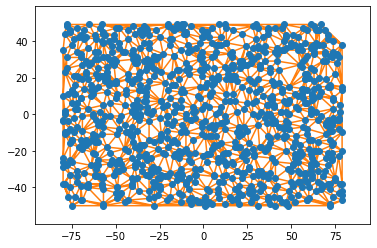

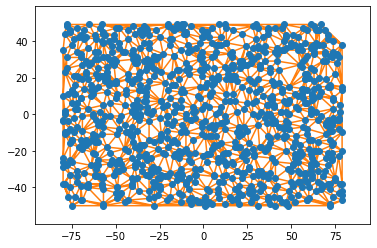

In [ ]:
delaunay_plot_2d(trilist)

**On a obtenu comme résultats :**

**Cas 2 : 1000 points
CPU times: user 8.86 ms, sys: 0 ns, total: 8.86 ms
Wall time: 8.93 ms**


In [ ]:
import numpy as np
import random
X = np.random.randint(-200,200,10000)
Y = np.random.randint(-200,200,10000)
listing = list(zip(X, Y))

import time
%time trilist = Delaunay(listing)

CPU times: user 143 ms, sys: 2.63 ms, total: 146 ms
Wall time: 147 ms


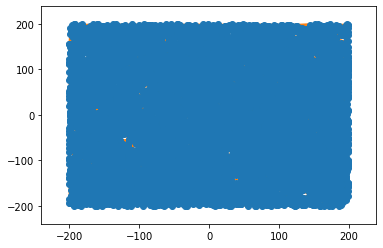

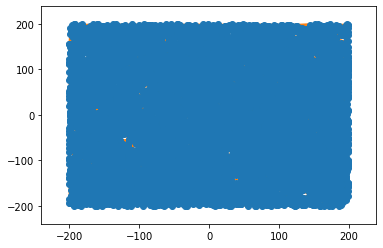

In [ ]:
delaunay_plot_2d(trilist)

**On a obtenu comme résultats :**

**Cas 3: 10000 points
CPU times: user 143 ms, sys: 2.63 ms, total: 146 ms
Wall time: 147 ms**

**Observation:**

**On constate que dès qu'on commence à augmenter le nombre de points le temps d'execution augmente aussi**




In [ ]:
# -----------------------------------------------------------------------------
# 1.1) Verifiez que les cardinaux de la triangulations respectent la 
# relation : t=2s-a'-2, ou a' est le nombre d'aretes de bord
# Commencez par trouvez une methode simple pour calculer le nombre d'aretes de 
# bord : a'
# Vous ecrirez les instructions qui permettent de calculer t, a' et s et 
# verifier l'egalite (en donnant les valeurs)


In [ ]:
# -----------------------------------------------------------------------------
# 1.2) Verifiez la structure de voisinnage : montrez sur un exemple que le voisin 
# du voisin donne l'identite


# -----------------------------------------------------------------------------
# 1.3) Extraire la frontiere de la triangulation en utilisant tri.neighbors :
# Devinez la valeur (de convention) quand il n'y a pas de voisin sur un cote 
# d'un triangle.
np.where(tri.neighbors == valeur_de_convention) 
# vous permettra d'extraire l'indice de tous les elements qui satisfont la proposition.
# Utilisez le resultat pour extraire les aretes de frontiere sous la forme 
# d'un tableau de doublets de sommets.
# Comparez le resultat obtenu avec tri.convex_hull, ils doivent etre equivalents


[[1, -1, 0], [], [0, -1], [1, -1], [1, -1, 0]]

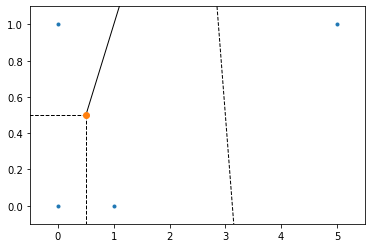

In [ ]:
# -----------------------------------------------------------------------------
# 2. Extraction d'une cellule de Voronoi
# -----------------------------------------------------------------------------
# Calculez le graphe de Voronoi pour un ensemble de points et afficher
# Analysez la structure de donnees renvoyee
# Extraire de cette structure le polygone correspondant a un site donne.
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as plt
vertices_ls = np.asarray([[0, 0], [1, 0], [5, 1], [0, 1]])

vor = Voronoi(vertices_ls)
voronoi_plot_2d(vor) 
#plt.show()

vor.points
vor.vertices
vor.ridge_points
vor.ridge_vertices

vor.point_region
vor.regions

[[11, 1, 4, 3, 10],
 [16, 0, -1, 15],
 [19, 15, -1, 17],
 [23, 16, 0, 5, 21],
 [28, 3, 4, 26],
 [30, 20, 21, 5, 29],
 [39, 37, 36, 35, 38],
 [36, 25, 26, 4, 1, 35],
 [43, 41, 40, 42],
 [43, 14, 39, 37, 41],
 [48, 44, 45, 46, 47],
 [45, 38, 35, 1, 11, 12, 44],
 [46, 6, 13, 14, 39, 38, 45],
 [52, 7, 8, 51],
 [63, 59, 60, 61, 62],
 [60, 19, 15, 16, 23, 24, 59],
 [61, 18, 17, 19, 60],
 [62, 49, 50, 18, 61],
 [66, 24, 23, 21, 20, 22, 64],
 [66, 24, 59, 63, 65],
 [74, 72, 71, 33, 31, 73],
 [79, 31, 33, 32, 77],
 [90, 86, 85, 83, 84, 87, 88, 89],
 [85, -1, 83],
 [86, 82, 29, 5, 0, -1, 85],
 [90, 82, 86],
 [90, 82, 29, 30, 89],
 [92, 84, 87, 81, 91],
 [93, 54, -1, 83, 84, 92],
 [98, 94, 93, 92, 91, 96],
 [98, 94, 70, 71, 33, 32, 97],
 [102, 100, 99, 101],
 [101, 42, 43, 14, 13, 99],
 [100, 53, 52, 7, 6, 13, 99],
 [102, 50, 18, 17, -1, 40, 42, 101],
 [107, 104, 103, 105, 106],
 [107, 53, 52, 51, 104],
 [107, 53, 100, 102, 50, 49, 106],
 [112, 58, 48, 44, 12, 111],
 [115, 76, 80, 78, 113],
 [118

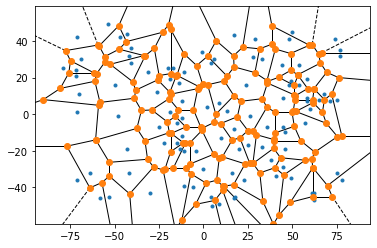

In [ ]:
# -----------------------------------------------------------------------------
# 2. Extraction d'une cellule de Voronoi
# -----------------------------------------------------------------------------
# Calculez le graphe de Voronoi pour un ensemble de points et afficher
# Analysez la structure de donnees renvoyee
# Extraire de cette structure le polygone correspondant a un site donne.
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as plt
import numpy as np
import random
X = np.random.randint(-80,80,100)
Y = np.random.randint(-50,50,100)
listing = list(zip(X, Y))

vor = Voronoi(listing)
voronoi_plot_2d(vor) 
#plt.show()

vor.points
vor.vertices
vor.ridge_points
vor.ridge_vertices

vor.point_region
vor.regions